In [1]:
from matplotlib import pyplot as plt
from meta.rsi_custom_env import RsiCustomEnv
from utils.charts.plot_data_with_rsi import plot_data_with_rsi
from utils.fetch_data_with_indicators import Api, fetch_data_with_indicators
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.env_checker import check_env

data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2015-01-01', '2023-01-01', '1d', ['RSI'])

env = RsiCustomEnv(data, action_space=3, observation_space=9)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


[*********************100%***********************]  1 of 1 completed


Step: 1, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 9000.0, Token Amount: 0.04762517964611287
Step: 2, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 8100.0, Token Amount: 0.0906838771318132
Step: 3, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 7290.0, Token Amount: 0.1289079694987908
Step: 4, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 6561.0, Token Amount: 0.16332284216067763
Step: 5, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 5904.9, Token Amount: 0.19500396885826887
Step: 6, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 5314.41, Token Amount: 0.22297880177260598
Step: 7, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 4782.969, Token Amount: 0.24639107105440045
Step: 8, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 4304.6721, Token Amount: 0.26736861384474

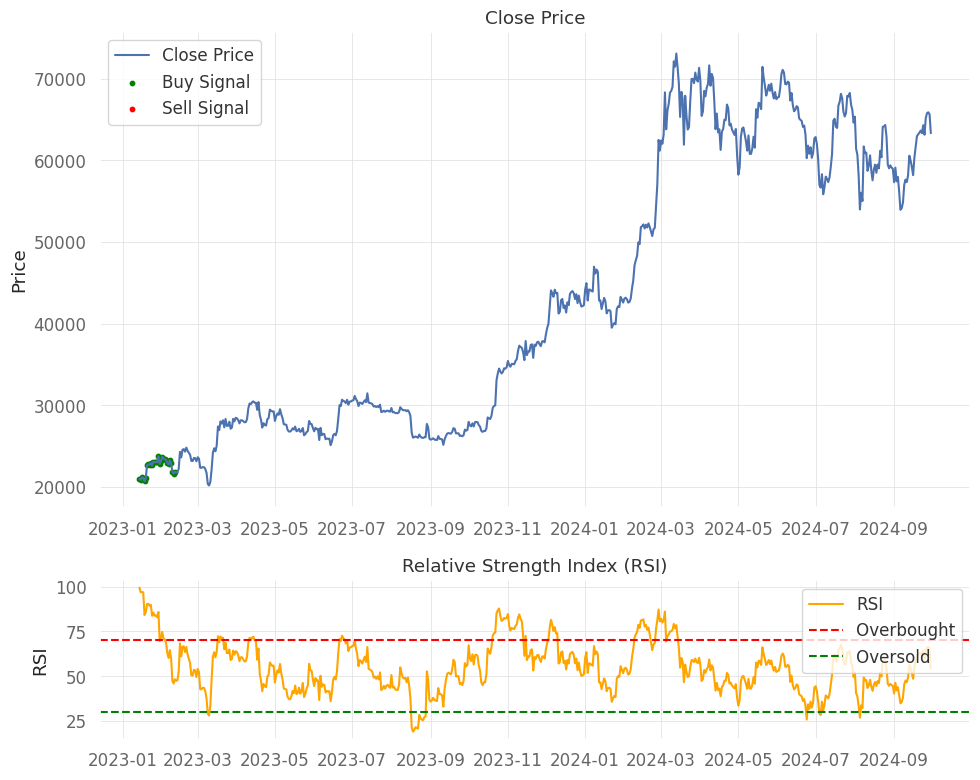

                    Strategy
------------------  ----------
Start Period        2023-01-14
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   189.56%
CAGR﹪              53.63%

Sharpe              1.29
Prob. Sharpe Ratio  98.12%
Sortino             2.09
Sortino/√2          1.48
Omega               1.27

Max Drawdown        -25.8%
Longest DD Days     200

Gain/Pain Ratio     0.27
Gain/Pain (1M)      2.51

Payoff Ratio        1.27
Profit Factor       1.27
Common Sense Ratio  1.55
CPC Index           0.8
Tail Ratio          1.23
Outlier Win Ratio   4.52
Outlier Loss Ratio  3.96

MTD                 11.1%
3M                  8.66%
6M                  -7.11%
YTD                 53.91%
1Y                  137.38%
3Y (ann.)           53.63%
5Y (ann.)           53.63%
10Y (ann.)          53.63%
All-time (ann.)     53.63%

Avg. Drawdown       -4.7%
Avg. Drawdown Days  16
Recovery Factor     4.85
Ulcer Index         0.1
Serenity Index      1.6

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


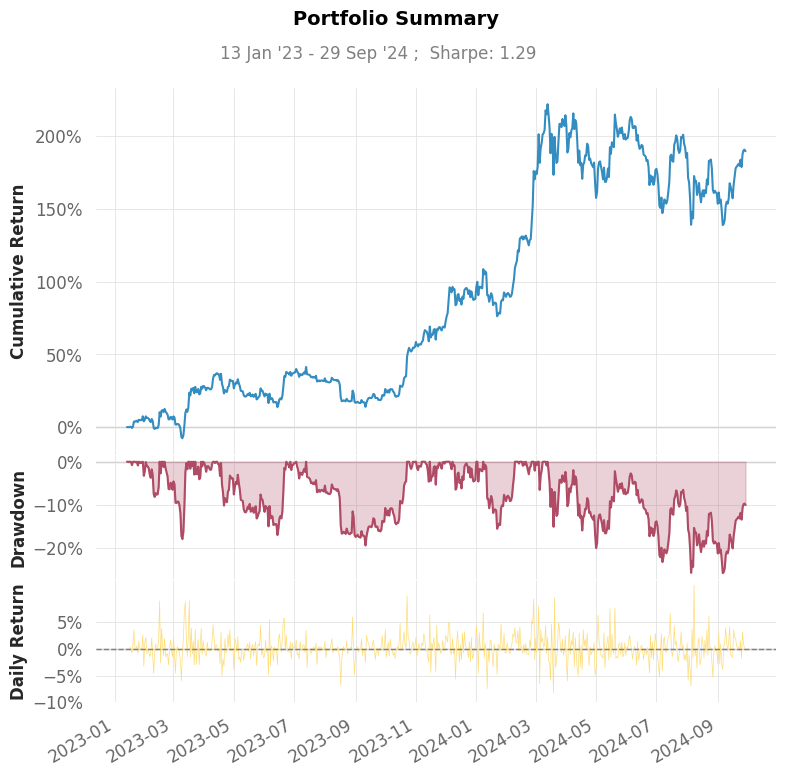

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


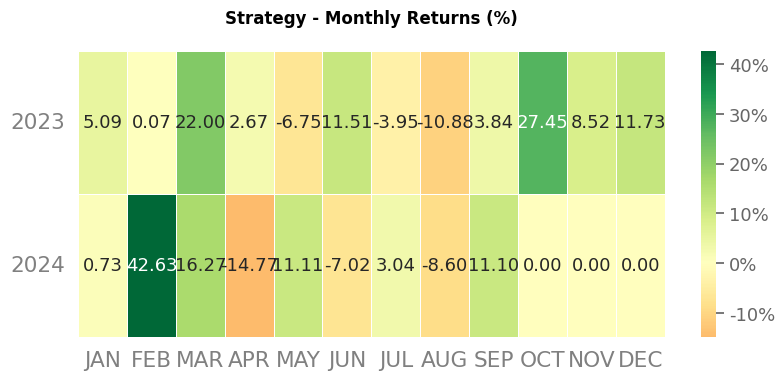

In [2]:
import pandas as pd
import quantstats as qs

test_data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2023-01-01', '2024-10-01', '1d', ['RSI'])

test_env = RsiCustomEnv(test_data, action_space=3, observation_space=9)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation, deterministic=True)
    done, info = test_env.test_step(action)
    
    test_env.render()
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)

Step: 1, Last Action: 1, Reward: -1, Total Reward: -1.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 2, Last Action: 1, Reward: -1, Total Reward: -2.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 3, Last Action: 2, Reward: -2, Total Reward: -4.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 4, Last Action: 0, Reward: -1, Total Reward: -5.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 5, Last Action: 0, Reward: -1, Total Reward: -6.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 6, Last Action: 0, Reward: -1, Total Reward: -7.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 7, Last Action: 0, Reward: -1, Total Reward: -8.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 8, Last Action: 0, Reward: -1, Total Reward: -9.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 9, Last Action: 2, Reward: -2, Total Reward: -11.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 10, Last Action: 0, R

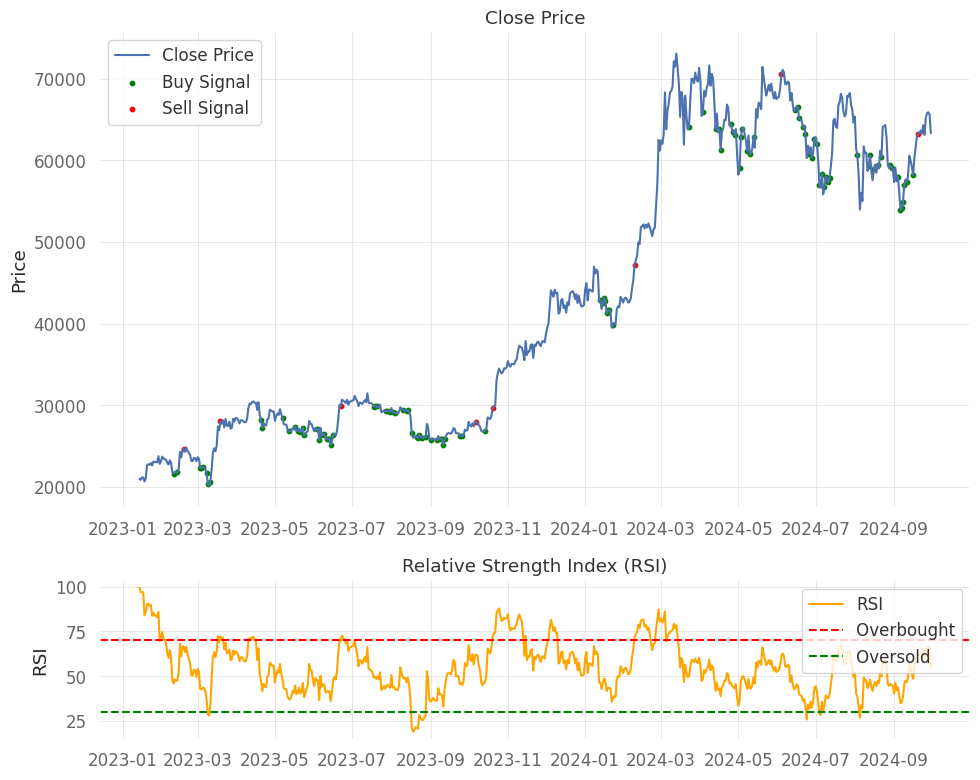

                    Strategy
------------------  ----------
Start Period        2023-01-14
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      61.0%

Cumulative Return   48.72%
CAGR﹪              17.39%

Sharpe              0.89
Prob. Sharpe Ratio  92.59%
Sortino             1.48
Sortino/√2          1.04
Omega               1.26

Max Drawdown        -18.38%
Longest DD Days     221

Gain/Pain Ratio     0.26
Gain/Pain (1M)      2.23

Payoff Ratio        1.31
Profit Factor       1.26
Common Sense Ratio  1.52
CPC Index           0.81
Tail Ratio          1.21
Outlier Win Ratio   9.92
Outlier Loss Ratio  3.89

MTD                 7.01%
3M                  5.6%
6M                  10.07%
YTD                 18.61%
1Y                  23.6%
3Y (ann.)           17.39%
5Y (ann.)           17.39%
10Y (ann.)          17.39%
All-time (ann.)     17.39%

Avg. Drawdown       -2.91%
Avg. Drawdown Days  19
Recovery Factor     2.44
Ulcer Index         0.04
Serenity Index      1.56

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


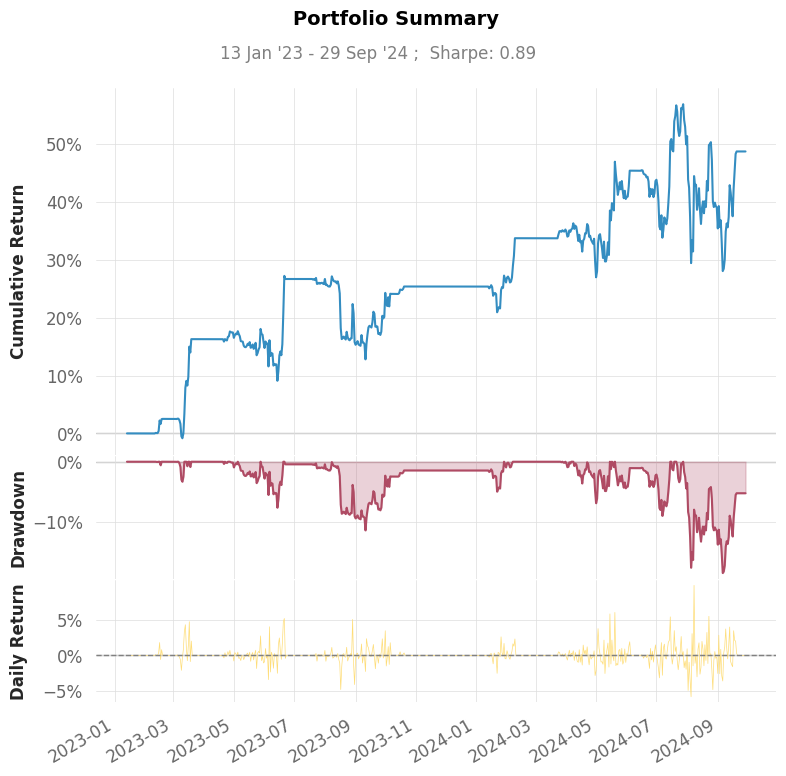

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


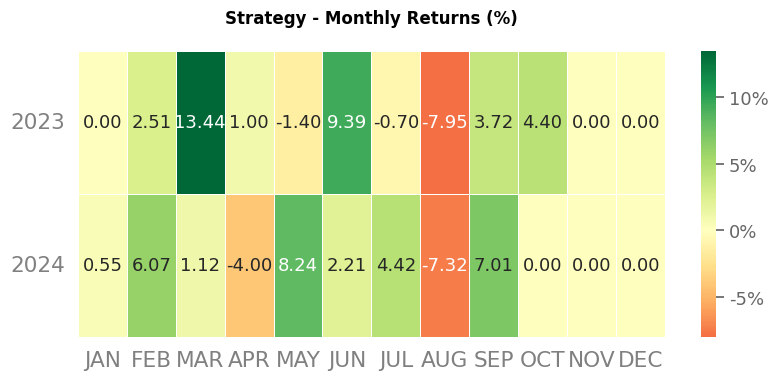

In [3]:
check_env(test_env)

portfolio_values = []
actions_data = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    test_env.render()
    portfolio_values.append(info['portfolio_value'])
    done = terminated or truncated

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)